<a href="https://colab.research.google.com/github/Analyst-Rhoda/NETWORK_ANALYSIS/blob/main/Wikivote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 df = pd.read_csv('/content/WIKIPEDIA.csv')

DATA CLEANING

In [ ]:
df.head()

,SRC,TGT,VOT,RES,Date,Time,YEA,Vote_Type,Timestamp
0,Steel1943,BDD,1,1,2013-04-19,23:13,2013,Support,2013-04-19 23:13:00
1,Cuchullain,BDD,1,1,2013-04-20,01:04,2013,Support,2013-04-20 01:04:00
2,INeverCry,BDD,1,1,2013-04-19,23:43,2013,Support,2013-04-19 23:43:00
3,Cncmaster,BDD,1,1,2013-04-20,00:11,2013,Support,2013-04-20 00:11:00
4,Miniapolis,BDD,1,1,2013-04-20,00:56,2013,Support,2013-04-20 00:56:00


In [ ]:
df.isnull().sum()

,0
SRC,1661
TGT,0
VOT,0
RES,0
YEA,0
Time,9367
Date,9367
Vote_Type,25
Review,16769


In [ ]:
df.duplicated().sum()

np.int64(554)

In [ ]:
df.columns

Index(['SRC', 'TGT', 'VOT', 'RES', 'YEA', 'Time', 'Date', 'Vote_Type',
       'Review'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-69-4ac1f8d99197>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
df['VOT'] = df['VOT'].astype(int)  # Vote type (-1, 0, 1)
df['RES'] = df['RES'].astype(int)  # Election result (-1, 1)
df['YEA'] = df['YEA'].astype(int)  # Election year

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198275 entries, 0 to 198274
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   SRC        196614 non-null  object        
 1   TGT        198275 non-null  object        
 2   VOT        198275 non-null  int64         
 3   RES        198275 non-null  int64         
 4   YEA        198275 non-null  int64         
 5   Time       188908 non-null  object        
 6   Date       188905 non-null  datetime64[ns]
 7   Vote_Type  198250 non-null  object        
 8   Review     181506 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 13.6+ MB


In [ ]:
df = df[['SRC', 'TGT', 'VOT', 'RES', 'Date', 'Time','YEA','Vote_Type']]
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188880 entries, 0 to 198273
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   SRC        188880 non-null  object        
 1   TGT        188880 non-null  object        
 2   VOT        188880 non-null  int64         
 3   RES        188880 non-null  int64         
 4   Date       188880 non-null  datetime64[ns]
 5   Time       188880 non-null  object        
 6   YEA        188880 non-null  int64         
 7   Vote_Type  188880 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 13.0+ MB


In [ ]:
df.head()

,SRC,TGT,VOT,RES,Date,Time,YEA,Vote_Type
0,Steel1943,BDD,1,1,2013-04-19,23:13,2013,Support
1,Cuchullain,BDD,1,1,2013-04-20,01:04,2013,Support
2,INeverCry,BDD,1,1,2013-04-19,23:43,2013,Support
3,Cncmaster,BDD,1,1,2013-04-20,00:11,2013,Support
4,Miniapolis,BDD,1,1,2013-04-20,00:56,2013,Support


In [ ]:
df.isnull().sum()

,0
SRC,0
TGT,0
VOT,0
RES,0
Date,0
Time,0
YEA,0
Vote_Type,0


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

In [ ]:
print(df[['Date', 'Time', 'Timestamp']].head(10))

        Date   Time           Timestamp
0 2013-04-19  23:13 2013-04-19 23:13:00
1 2013-04-20  01:04 2013-04-20 01:04:00
2 2013-04-19  23:43 2013-04-19 23:43:00
3 2013-04-20  00:11 2013-04-20 00:11:00
4 2013-04-20  00:56 2013-04-20 00:56:00
5 2013-04-20  01:53 2013-04-20 01:53:00
6 2013-04-20  02:00 2013-04-20 02:00:00
7 2013-04-20  02:18 2013-04-20 02:18:00
8 2013-04-20  02:22 2013-04-20 02:22:00
9 2013-04-20  03:09 2013-04-20 03:09:00


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

NETWORK ANALYSIS

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add edges (SRC to TGT with attributes)
for index, row in df.iterrows():
    G.add_edge(row['SRC'], row['TGT'], vote=row['VOT'], vote_type=row['Vote_Type'])

# Print basic graph info (Fixed)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 11127
Number of edges: 180838


QUESTION 1

In [ ]:
# Degree Centrality (number of connections)
degree_centrality = nx.degree_centrality(G)

QUESTION 2: Most Voted Targets Over Time

In [ ]:
# Count votes received per TGT
target_votes = df.groupby("TGT")['VOT'].sum().reset_index()

# Sort by most voted targets
target_votes = target_votes.sort_values(by="VOT", ascending=False)

# Display top 10
print(target_votes.head(10))

                                 TGT  VOT
484   Can't sleep, clown will eat me  315
3236                          Werdna  297
604                             Cobi  291
2312                    PeterSymonds  281
986                        Everyking  266
2316                       Phaedriel  265
958                        Enigmaman  258
1250                     HJ Mitchell  257
661                       Crzrussian  247
946                           Elonka  240


In [ ]:
# Find the most voted targets overall
top_targets = df["TGT"].value_counts().head(5)
print("Top 5 Most Voted Targets:\n", top_targets)

Top 5 Most Voted Targets:
 TGT
Everyking         987
TenPoundHammer    778
MZMcBride         663
Cobi              639
Elonka            628
Name: count, dtype: int64


QUESTION 3

In [ ]:
#Count votes per day
votes_per_day = df.groupby("Date").size()

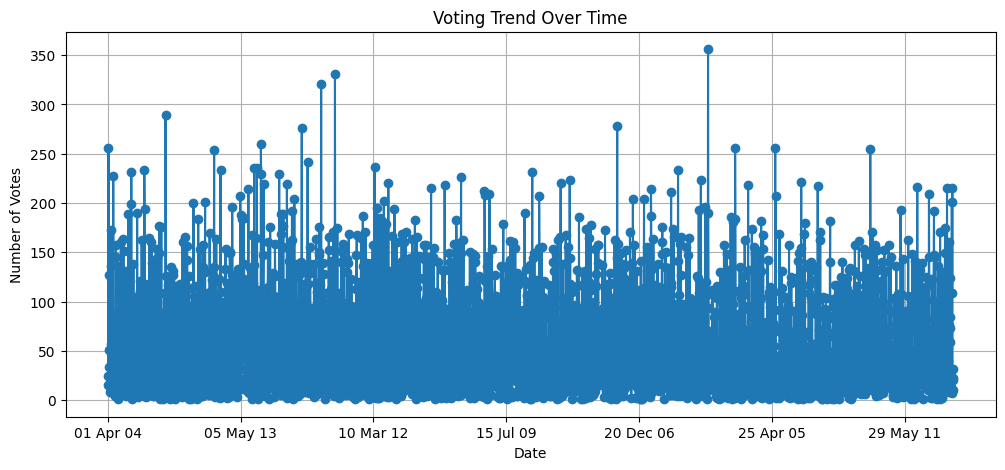

In [ ]:
# Plot
plt.figure(figsize=(12, 5))
votes_per_day.plot(marker="o")
plt.xlabel("Date")
plt.ylabel("Number of Votes")
plt.title("Voting Trend Over Time")
plt.grid()
plt.show()

QUESTION 4

In [ ]:
# Count votes per hour
votes_per_hour = df["Time"].value_counts().sort_index()

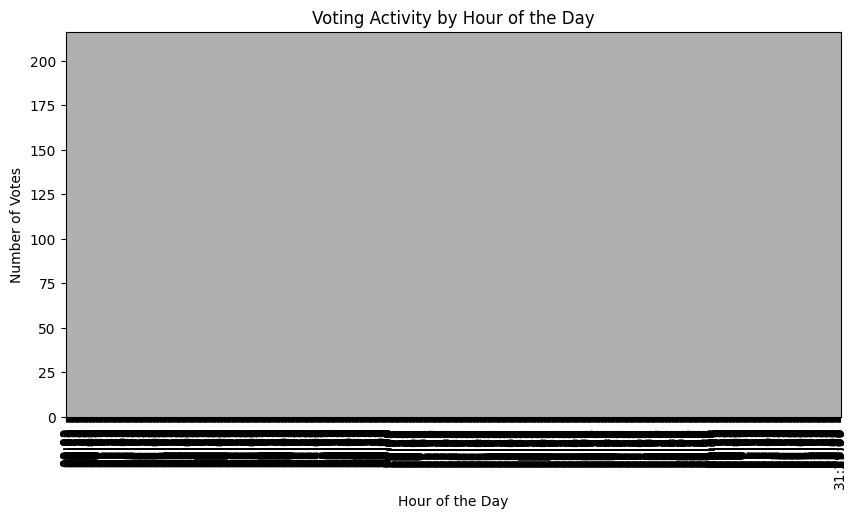

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
votes_per_hour.plot(kind="bar", color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Votes")
plt.title("Voting Activity by Hour of the Day")
plt.grid()
plt.show()

QUESTION 4

In [ ]:
avg_votes = df["TGT"].value_counts().mean()
print(f"Average votes per target: {avg_votes:.2f}")

Average votes per target: 56.70


QUESTION 5

In [ ]:
# Extract year from Date
# Ensure 'Date' column is of datetime type before using .dt accessor
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df["Year"] = df["Date"].dt.year

# Count votes per year
votes_per_year = df["Year"].value_counts().sort_index()

print("Votes per year:\n", votes_per_year)

<ipython-input-106-a6303a04c232>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Votes per year:
 Year
2003.0      155
2004.0     4511
2005.0    17060
2006.0    43226
2007.0    40932
2008.0    29491
2009.0    21219
2010.0    13906
2011.0     8447
2012.0     6610
2013.0     3348
Name: count, dtype: int64


QUESTION 4

In [ ]:
top_targets = df["TGT"].value_counts().head(5)
print("Top 5 Most Voted Targets:\n", top_targets)

Top 5 Most Voted Targets:
 TGT
Everyking         987
TenPoundHammer    778
MZMcBride         663
Cobi              639
Elonka            628
Name: count, dtype: int64


TOP SUPERCONNECTORS

In [ ]:
# Compute degree centrality (total connections)
degree_centrality = nx.degree_centrality(G)

# Convert to DataFrame
degree_df = pd.DataFrame(degree_centrality.items(), columns=["Voter", "Degree_Centrality"])

# Sort and get top 10
top_superconnectors = degree_df.sort_values(by="Degree_Centrality", ascending=False).head(10)
print(top_superconnectors)

              Voter  Degree_Centrality
2205       Siva1979           0.124692
910   Mailer diablo           0.084886
822       Everyking           0.081898
393             NaN           0.081371
3269    Merovingian           0.077153
97            MONGO           0.076714
349       Acalamari           0.072408
43        Wizardman           0.070035
2469        Majorly           0.066784
85            Pedro           0.065290


In [ ]:
unique_voters_per_target = df.groupby("TGT")["SRC"].nunique().sort_values(ascending=False)
print("Targets with Most Unique Voters:\n", unique_voters_per_target.head(10))

Targets with Most Unique Voters:
 TGT
Everyking         725
TenPoundHammer    533
MZMcBride         517
Elonka            490
Werdna            484
Cobi              458
Ironholds         443
Enigmaman         378
Kww               374
Majorly           355
Name: SRC, dtype: int64


In [ ]:
from networkx.algorithms import community

# Detect communities in the network
communities = list(community.louvain_communities(G))

# Display size of the largest 5 communities
for i, c in enumerate(sorted(communities, key=len, reverse=True)[:5]):
    print(f"Community {i+1}: {len(c)} members")

Community 1: 2789 members
Community 2: 2379 members
Community 3: 2374 members
Community 4: 2120 members
Community 5: 1715 members


In [ ]:
isolated_voters = [node for node, degree in dict(G.degree()).items() if degree == 1]
print("Number of isolated voters:", len(isolated_voters))
print("Example isolated voters:", isolated_voters[:10])

Number of isolated voters: 3652
Example isolated voters: ['Film at 11', 'Angelo1345', 'Wangxuan8331800', 'JennKR', 'Hughesdarren', 'Theonesean', 'NorthBySouthBaranof', 'Bahudhara', 'Dan arndt', 'Liangshan Yi']


In [ ]:
# Check for NaT (invalid dates)
if df["Date"].isna().sum() > 0:
    print("Warning: Some dates could not be converted. Check your data.")

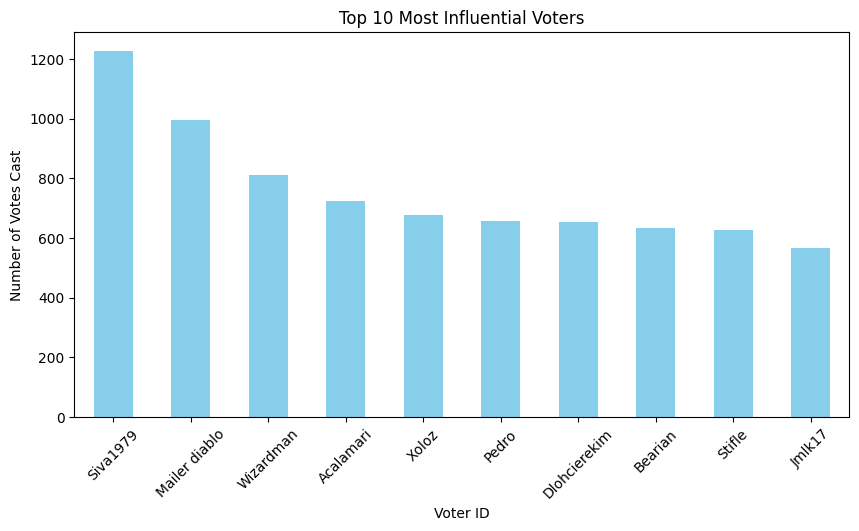

In [ ]:
# Count votes cast by each voter
voter_counts = df["SRC"].value_counts().head(10)

# Plot results
plt.figure(figsize=(10, 5))
voter_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Voter ID")
plt.ylabel("Number of Votes Cast")
plt.title("Top 10 Most Influential Voters")
plt.xticks(rotation=45)
plt.show()

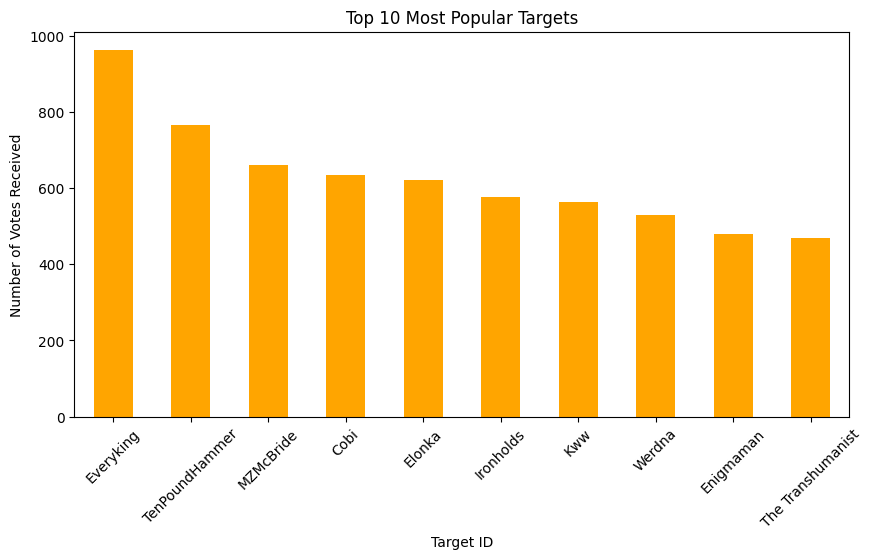

In [ ]:
# Count votes received by each target
target_counts = df["TGT"].value_counts().head(10)

# Plot results
plt.figure(figsize=(10, 5))
target_counts.plot(kind="bar", color="orange")
plt.xlabel("Target ID")
plt.ylabel("Number of Votes Received")
plt.title("Top 10 Most Popular Targets")
plt.xticks(rotation=45)
plt.show()

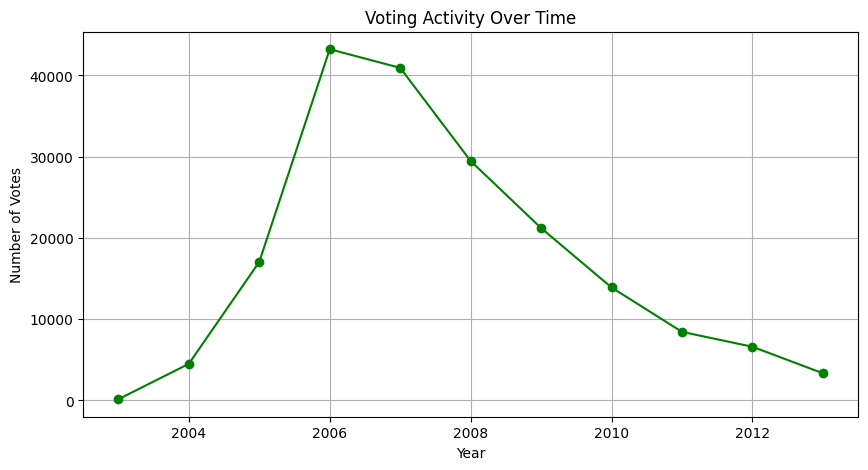

In [ ]:
# Count votes per year
votes_per_year = df.groupby(df["Date"].dt.year).size()

# Plot results
plt.figure(figsize=(10, 5))
votes_per_year.plot(kind="line", marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Number of Votes")
plt.title("Voting Activity Over Time")
plt.grid(True)
plt.show()

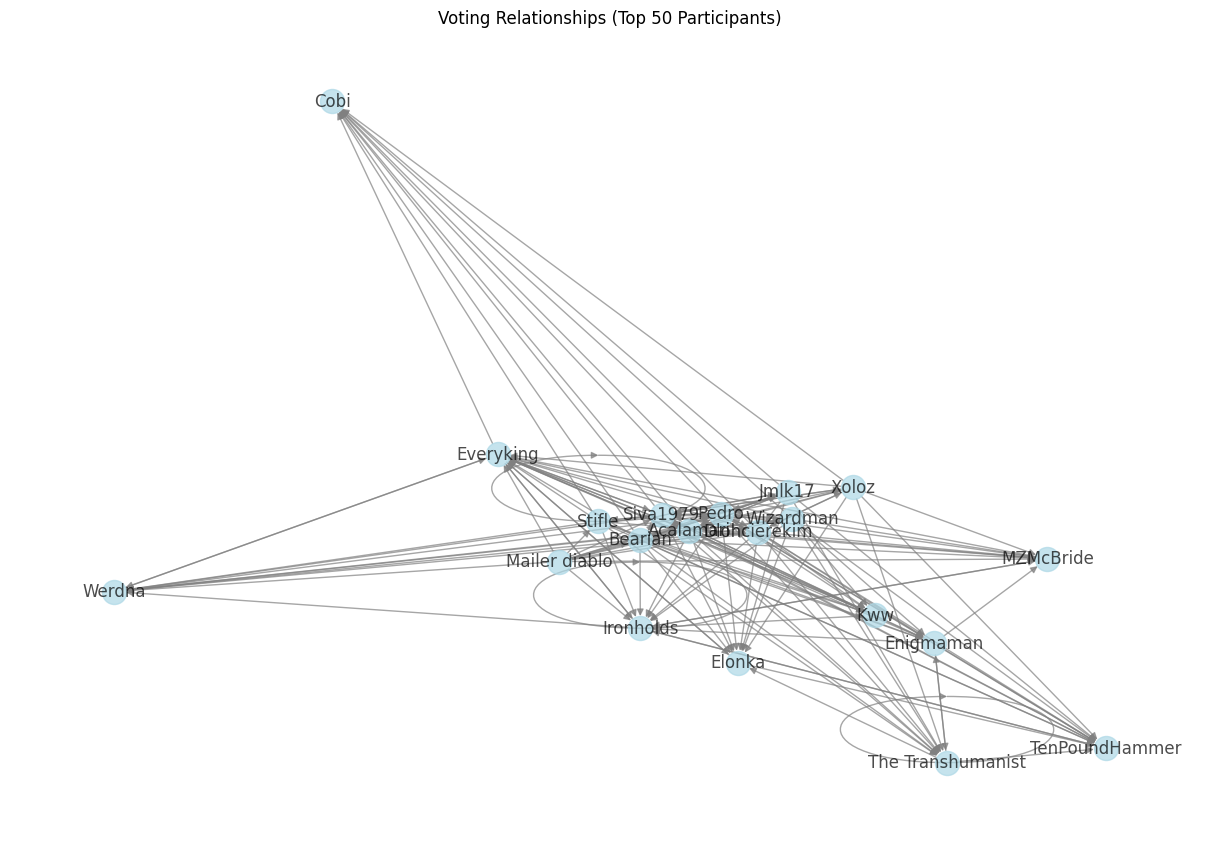

In [ ]:
# Draw a subgraph of the top 50 voters and targets for clarity
top_voters = voter_counts.index.tolist()
top_targets = target_counts.index.tolist()

subG = G.subgraph(top_voters + top_targets)

plt.figure(figsize=(12, 8))
nx.draw(subG, with_labels=True, node_size=300, node_color="lightblue", edge_color="gray", alpha=0.7)
plt.title("Voting Relationships (Top 50 Participants)")
plt.show()

<ipython-input-147-b98aa0a9b531>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_connectors, x="User", y="Betweenness Centrality", palette="coolwarm")


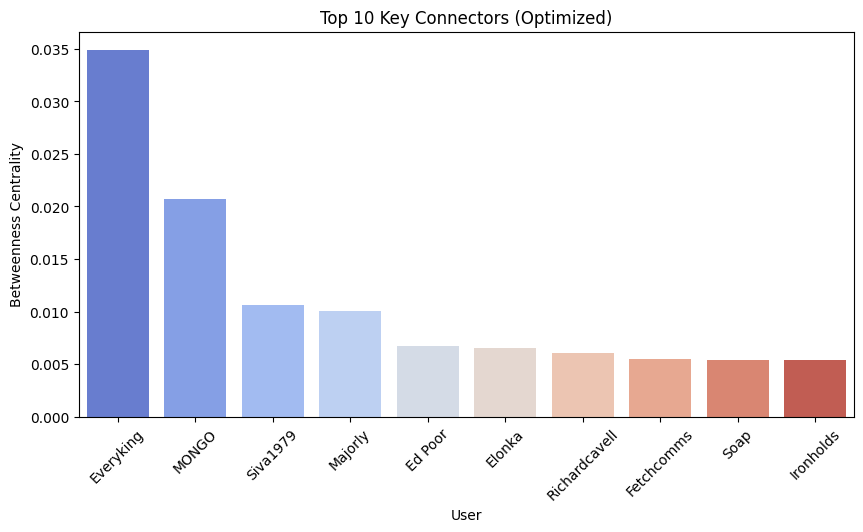

In [ ]:
# Select top 100 most active users (based on degree)
top_users = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]
top_nodes = [node[0] for node in top_users]

# Compute betweenness centrality only for these top 100 nodes
betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Approximate with k

# Sort and get top 10
top_connectors = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to DataFrame
df_connectors = pd.DataFrame(top_connectors, columns=["User", "Betweenness Centrality"])

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(data=df_connectors, x="User", y="Betweenness Centrality", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("User")
plt.ylabel("Betweenness Centrality")
plt.title("Top 10 Key Connectors (Optimized)")
plt.show()